<a href="https://colab.research.google.com/github/Rstam59/TaskDataRepoForStudents/blob/main/California_house_prices_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Usual method

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/housing.csv

--2024-02-02 20:09:46--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.009s  

2024-02-02 20:09:46 (154 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [3]:
housing = pd.read_csv("/content/housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
from sklearn.model_selection import train_test_split

X = housing.drop('median_income', axis = 1)
y = housing['median_income'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
cat_features = X_train.select_dtypes(exclude = [np.number]).columns
num_features = X_train.select_dtypes(include = [np.number]).columns
num_features

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_house_value'],
      dtype='object')

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

transformer = ColumnTransformer([
    ('num', num_pipeline, ['total_bedrooms']),
    ('cat', cat_pipeline, cat_features)
], remainder = 'passthrough')

In [10]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

column_names = transformer.get_feature_names_out()

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns = column_names)
X_train_transformed_df

,num__total_bedrooms,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__longitude,remainder__latitude,remainder__housing_median_age,remainder__total_rooms,remainder__population,remainder__households,remainder__median_house_value
0,434.0,1.0,0.0,0.0,0.0,0.0,-122.70,38.35,14.0,2313.0,954.0,397.0,146500.0
1,673.0,1.0,0.0,0.0,0.0,0.0,-118.29,34.01,50.0,2238.0,2247.0,583.0,125000.0
2,720.0,1.0,0.0,0.0,0.0,0.0,-122.49,38.32,17.0,3308.0,1587.0,632.0,176000.0
3,318.0,1.0,0.0,0.0,0.0,0.0,-118.40,34.03,24.0,1101.0,491.0,287.0,319400.0
4,420.0,1.0,0.0,0.0,0.0,0.0,-118.10,33.82,36.0,2422.0,1193.0,421.0,225700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,270.0,1.0,0.0,0.0,0.0,0.0,-118.27,33.96,38.0,1126.0,999.0,265.0,91700.0
16508,570.0,1.0,0.0,0.0,0.0,0.0,-119.64,34.43,34.0,3045.0,1002.0,488.0,500001.0
16509,434.0,0.0,1.0,0.0,0.0,0.0,-119.72,36.76,23.0,6403.0,3573.0,1260.0,69000.0
16510,269.0,1.0,0.0,0.0,0.0,0.0,-118.45,33.99,45.0,1132.0,654.0,264.0,343100.0


In [11]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()

reg.fit(X_train_transformed_df, y_train)
reg.score(X_train_transformed_df, y_train)

0.9681372916609137

In [12]:
model_1_result = reg.score(X_test_transformed, y_test) * 100
model_1_result

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


77.86464671762204

#Analyzing Data

In [13]:
housing = pd.read_csv("/content/housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


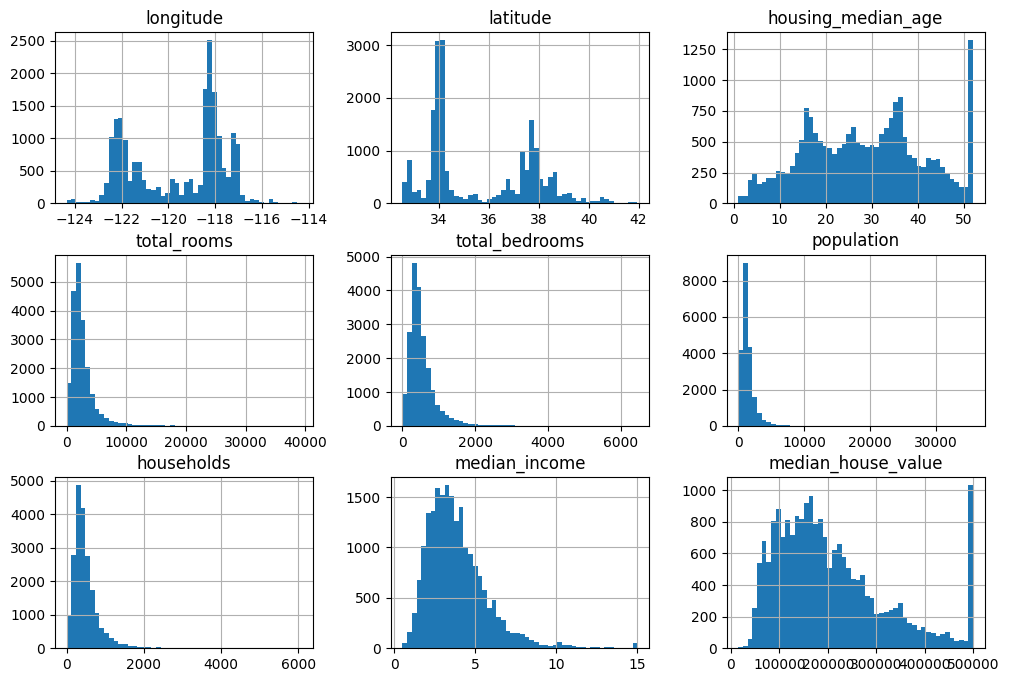

In [14]:
housing.hist(bins =50, figsize = (12, 8));

In [15]:
housing['median_income'].value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
           ..
4.2670      1
2.1217      1
4.9706      1
3.4450      1
2.0943      1
Name: median_income, Length: 12928, dtype: int64

In [16]:
housing.corr()['median_house_value'].sort_values(ascending = False) * 100


<ipython-input-16-9d3f2714fd87>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corr()['median_house_value'].sort_values(ascending = False) * 100


median_house_value    100.000000
median_income          68.807521
total_rooms            13.415311
housing_median_age     10.562341
households              6.584265
total_bedrooms          4.968618
population             -2.464968
longitude              -4.596662
latitude              -14.416028
Name: median_house_value, dtype: float64

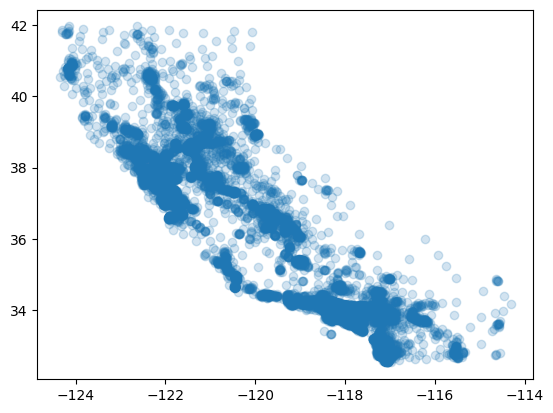

In [17]:
plt.scatter(housing['longitude'], housing['latitude'], alpha = 0.2)

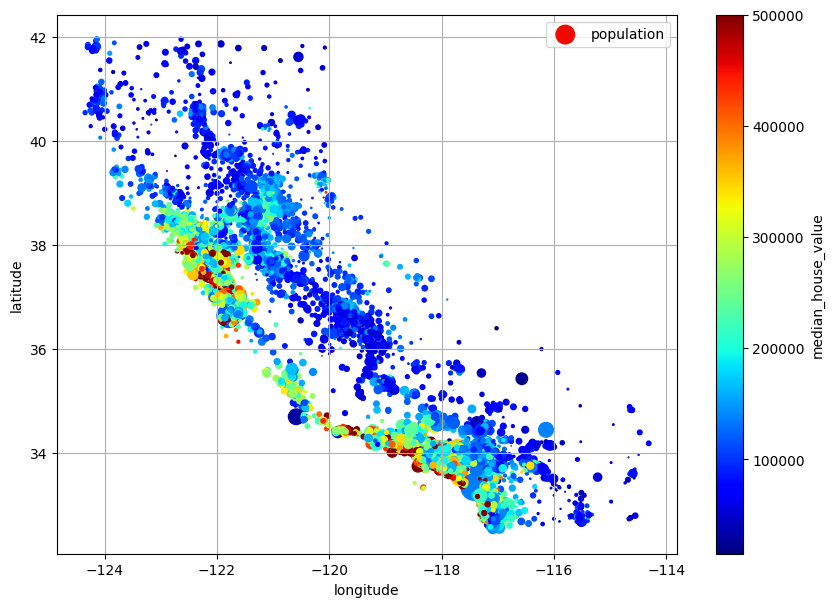

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True,figsize=(10, 7));

<Axes: >

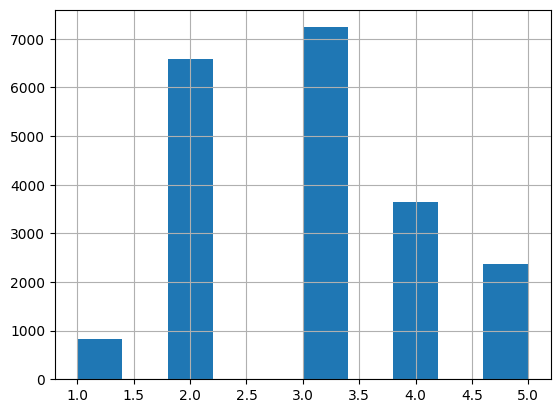

In [19]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins = [0., 1.5, 3.0, 4.5, 6, np.inf],
                               labels = [1, 2, 3, 4, 5])
housing['income_cat'].hist()

In [20]:
#Feature engineering (Adding new columns based on calculations)
housing['rooms_per_house'] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [21]:
strat_train_set, strat_test_set = train_test_split(housing, test_size = 0.2, random_state = 42, stratify = housing['income_cat'])

In [22]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_house,bedrooms_ratio,people_per_house
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN,5,7.000000,0.149560,2.677419
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN,4,5.841912,0.166772,2.955882
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN,3,3.935462,0.295858,1.421158
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN,3,5.854054,0.195291,2.897297
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY,3,3.584184,0.366548,1.849490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,90600.0,NEAR OCEAN,2,5.622921,0.196252,2.229205
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,INLAND,2,4.343675,0.252198,2.706444
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,<1H OCEAN,4,6.924242,0.160832,2.984848
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,214700.0,NEAR BAY,4,5.339332,0.184401,3.825193


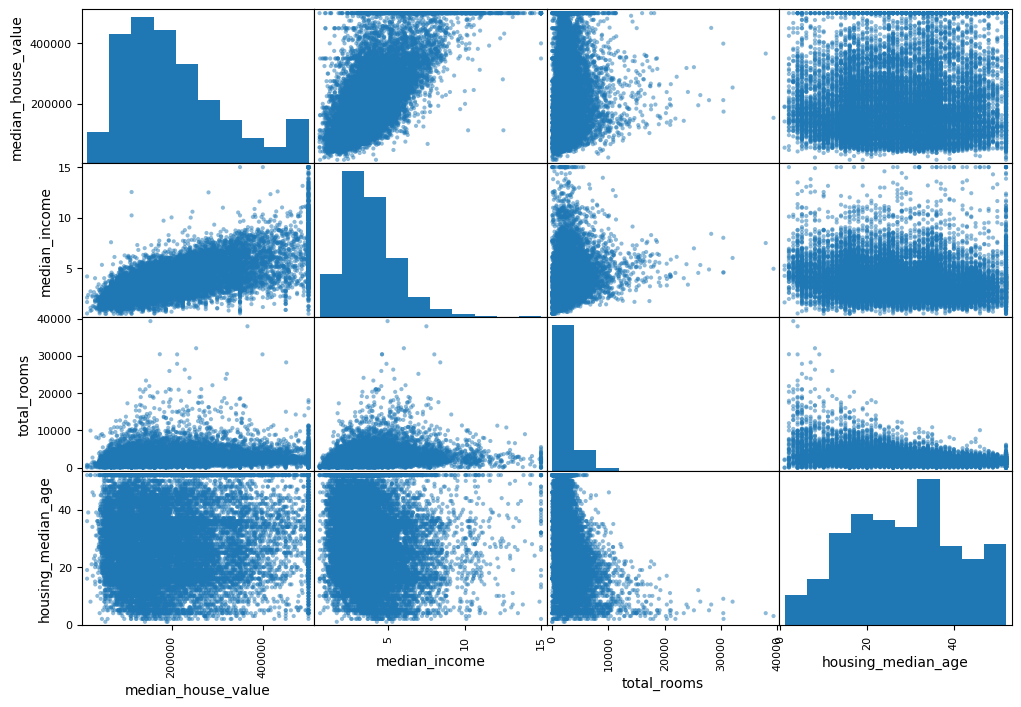

In [23]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(strat_train_set[attributes], figsize = (12, 8));

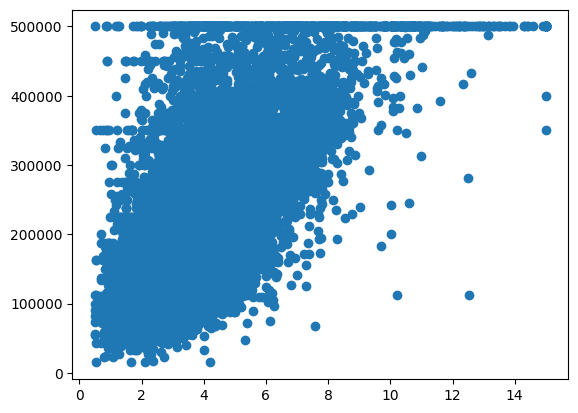

In [24]:
plt.scatter(strat_train_set['median_income'], strat_train_set['median_house_value'])

In [25]:
corralation = strat_train_set.corr()
corralation['median_house_value'].sort_values(ascending = False)

<ipython-input-25-05664d90a419>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corralation = strat_train_set.corr()


median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [26]:
train_set = strat_train_set.drop("median_house_value", axis = 1)
train_labels = strat_train_set['median_house_value'].copy()

In [27]:
num_features = train_set.select_dtypes(include = [np.number]).columns
cat_features = ['ocean_proximity']

In [28]:
#Creating Pipelines and transformers
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy = 'median')),
  ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

In [29]:
transformer = ColumnTransformer([
    ('cat_pipeline', cat_pipeline, cat_features),
    ('num_pipeline', num_pipeline, num_features)
], remainder = 'passthrough')

In [30]:
train_set_transformed = transformer.fit_transform(train_set)

column_names = transformer.get_feature_names_out()

train_set_transformed_df = pd.DataFrame(train_set_transformed, columns = column_names)
train_set_transformed_df

,cat_pipeline__ocean_proximity_<1H OCEAN,cat_pipeline__ocean_proximity_INLAND,cat_pipeline__ocean_proximity_ISLAND,cat_pipeline__ocean_proximity_NEAR BAY,cat_pipeline__ocean_proximity_NEAR OCEAN,num_pipeline__longitude,num_pipeline__latitude,num_pipeline__housing_median_age,num_pipeline__total_rooms,num_pipeline__total_bedrooms,num_pipeline__population,num_pipeline__households,num_pipeline__median_income,num_pipeline__rooms_per_house,num_pipeline__bedrooms_ratio,num_pipeline__people_per_house,remainder__income_cat
0,0.0,0.0,0.0,1.0,0.0,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,-0.866027,2.153743,-0.330204,2.0
1,1.0,0.0,0.0,0.0,0.0,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,0.024550,-0.569651,-0.253616,5.0
2,0.0,1.0,0.0,0.0,0.0,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,-0.041193,-0.215784,-0.051041,2.0
3,0.0,1.0,0.0,0.0,0.0,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,-0.034858,-0.154314,-0.141475,2.0
4,0.0,0.0,0.0,0.0,1.0,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,-0.666554,1.132023,-0.306148,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1.0,0.0,0.0,0.0,0.0,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,-0.452111,0.948316,-0.269780,4.0
16508,0.0,1.0,0.0,0.0,0.0,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.036792,-0.204419,-0.073741,2.0
16509,0.0,0.0,0.0,0.0,1.0,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,-0.109987,-0.262436,0.158542,3.0
16510,1.0,0.0,0.0,0.0,0.0,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,-0.360937,0.318463,-0.210332,3.0


#Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.metrics import root_mean_squared_error


lin_reg = LinearRegression()

lin_reg.fit(train_set_transformed_df, train_labels)
lin_reg.score(train_set_transformed_df, train_labels)

0.662538443521426

In [32]:
test_set = strat_test_set.drop('median_house_value', axis = 1)
test_labels = strat_test_set['median_house_value'].copy()

In [33]:
test_set_transformed = transformer.transform(test_set)
test_set_transformed_df = pd.DataFrame(test_set_transformed, columns = column_names)

In [34]:
lin_preds = lin_reg.predict(test_set_transformed_df)
lin_preds

array([385344., 251264., 372544., ..., 262432., 233824., 259616.])

In [35]:
mean_absolute_error(test_labels, lin_preds) ** 2

2504047397.4768453

In [36]:
mean_squared_error(test_labels, lin_preds)

5114332295.909157

In [37]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_reg, test_set_transformed_df, test_labels, cv = 10).mean()

0.6355255782542336

In [136]:
lin_reg.score(test_set_transformed_df, test_labels)

0.6179331563052505

#DecisionTreeRegressor

In [140]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()

decision_tree.fit(train_set_transformed_df, train_labels)
decision_tree.score(train_set_transformed_df, train_labels)

1.0

In [141]:
decision_tree.score(test_set_transformed_df, test_labels)

0.6201269722152549

In [151]:
decision_tree_preds = decision_tree.predict(test_set_transformed_df)
mean_absolute_error(test_labels, decision_tree_preds)

45183.6160368217

#RandomForestRegressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

reg_forest = RandomForestRegressor()
reg_forest.fit(train_set_transformed_df, train_labels)
reg_forest.score(test_set_transformed_df, test_labels)

0.8100978073805801